In [1]:
def draw_soccer_pitch(figsize=(12, 9), field_length=120, field_width=90):
        """
        Function that plots a scaled soccer pitch of length 120*90 metres which
        are the maximum dimensions allowed by FIFAs "Laws Of The Game"
        """
        rect = patches.Rectangle((-1, -1), 122, 92, linewidth=0.1,
                                 edgecolor='r', facecolor='darkgreen', zorder=0)

        fig, ax = plt.subplots(1, figsize=figsize)
        ax.add_patch(rect)
        # Main pitch markings, ie sidelines, penalty area and halfway line
        plt.plot([0, 0,  0, 120, 120, 0,     0,  16.5,  16.5,     0,     0,   5.5,   5.5,
                  0,  0, 60, 60, 120,   120, 103.5, 103.5,   120,   120, 114.5, 114.5,   120],
                 [0, 0, 90,  90,   0, 0, 25.85, 25.85, 66.15, 66.15, 55.15, 55.15, 36.85,
                  36.85, 90, 90,  0,   0, 25.85, 25.85, 66.15, 66.15, 55.15, 55.15, 36.85, 36.85], color='white')

        # Ajustar el tamaño del campo de fútbol según field_length y field_width
        scale_x = 120 / field_length
        scale_y = 90 / field_width
        ax.set_xlim(-1 * scale_x, 121 * scale_x)
        ax.set_ylim(-1 * scale_y, 91 * scale_y)

        # Secondary pitch markings, ie penalty spots, centre circle etc
        plt.plot([11, 11.5],[45, 45], color='white')
        plt.plot([109, 108.5],[45, 45], color='white')

        centre_circle = patches.Circle([60, 45], 9.15, edgecolor='white', facecolor='darkgreen')
        ax.add_patch(centre_circle)

        left_arc = patches.Arc([16.5, 45], 9.15, 16, theta1=270.0, theta2=90.0, color='white')
        ax.add_patch(left_arc)
        right_arc = patches.Arc([103.5, 45], 9.15, 16, theta1=90.0, theta2=270.0, color='white')
        ax.add_patch(right_arc)

        bl_corner = patches.Arc([0, 0], 2.5, 2.5, theta1=0.0, theta2=90.0, color='white')
        tl_corner = patches.Arc([0, 90], 2.5, 2.5, theta1=270.0, color='white')
        br_corner = patches.Arc([120, 0], 2.5, 2.5, theta1=90.0, theta2=180.0, color='white')
        tr_corner = patches.Arc([120, 90], 2.5, 2.5, theta1=180.0, theta2=270.0,color='white')
        ax.add_patch(bl_corner)
        ax.add_patch(tl_corner)
        ax.add_patch(br_corner)
        ax.add_patch(tr_corner)

        plt.xlim(-1, 121)
        plt.ylim(-1, 91)
        plt.axis('off')

        return fig, ax

#Llamar todas las funciones

In [2]:
!git clone https://github.com/Kevinsky29/SoccerPredict_and_Scrapping

Cloning into 'SoccerPredict_and_Scrapping'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 40 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (40/40), 381.44 KiB | 3.85 MiB/s, done.


In [3]:
%cd SoccerPredict_and_Scrapping
%cd Examples

/content/SoccerPredict_and_Scrapping
/content/SoccerPredict_and_Scrapping/Examples


In [4]:
!ls *.csv

'dataset - 2020-09-24.csv'   MC_matches.csv   MC_players.csv   MC_seasons.csv


#Read the CSV

In [5]:
import pandas as pd

df_matches = pd.read_csv('MC_matches.csv')
df_seasons = pd.read_csv('MC_seasons.csv')
df_players = pd.read_csv('MC_players.csv')

In [6]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

field_length = 120
field_width = 90

fecha_dropdown = widgets.Dropdown(options=df_players['player_name'].unique(), description='Jugador:')
evento_dropdown = widgets.Dropdown(options=df_matches['result'].unique(), description='Evento:')
temporada_dropdown = widgets.Dropdown(options=df_matches['season'].unique(), description='Temporada:')

output = widgets.Output()

def filtrar_df(fecha, evento, temporada):
    filtered_df = df_matches.copy()
    if fecha:
        filtered_df = filtered_df[filtered_df['player'] == fecha]
    if evento:
        filtered_df = filtered_df[filtered_df['result'] == evento]
    if temporada:
        filtered_df = filtered_df[filtered_df['season'] == temporada]

    filtered_df = filtered_df[(filtered_df['a_team'] == 'Manchester City') | (filtered_df['h_team'] == 'Manchester City')]

    filtered_df['X'] = pd.to_numeric(filtered_df['X'], errors='coerce')
    filtered_df['Y'] = pd.to_numeric(filtered_df['Y'], errors='coerce')


    adjusted_x = filtered_df['X'] * field_length
    adjusted_y = filtered_df['Y'] * field_width

    with output:
        output.clear_output()
        display(filtered_df)


        fig, ax = draw_soccer_pitch(field_length=field_length, field_width=field_width)
        ax.scatter(adjusted_x, adjusted_y, color='red', marker='o', s=100)
        plt.show()


def filtros_actualizados(change):
    fecha = fecha_dropdown.value if fecha_dropdown.value != 'None' else None
    evento = evento_dropdown.value if evento_dropdown.value != 'None' else None
    temporada = temporada_dropdown.value if temporada_dropdown.value != 'None' else None
    filtrar_df(fecha, evento, temporada)

fecha_dropdown.observe(filtros_actualizados, 'value')
evento_dropdown.observe(filtros_actualizados, 'value')
temporada_dropdown.observe(filtros_actualizados, 'value')
display(widgets.VBox([fecha_dropdown, evento_dropdown, temporada_dropdown, output]))
filtrar_df(None, None, None)

#Predicciones

##Temporadas

In [7]:
df_seasons

,id,isResult,side,datetime,result,id.1,title,short_title,id.2,title.1,short_title.1,win,draw,loss,season,point,points
0,4757,True,away,2014-08-17 16:00:00,w,86,Newcastle United,NEW,88,Manchester City,MCI,0.246341,0.262430,0.491229,2014/2015,3,3
1,4768,True,home,2014-08-25 20:00:00,w,88,Manchester City,MCI,87,Liverpool,LIV,0.461520,0.282050,0.256430,2014/2015,3,6
2,4770,True,home,2014-08-30 15:00:00,l,88,Manchester City,MCI,85,Stoke,STO,0.489189,0.390544,0.120268,2014/2015,0,6
3,4719,True,away,2014-09-13 12:45:00,d,83,Arsenal,ARS,88,Manchester City,MCI,0.359587,0.195853,0.444560,2014/2015,1,7
4,4737,True,home,2014-09-21 16:00:00,d,88,Manchester City,MCI,80,Chelsea,CHE,0.358269,0.301506,0.340226,2014/2015,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,18546,True,home,2023-05-06 14:00:00,w,88,Manchester City,MCI,245,Leeds,LED,0.917149,0.073522,0.009329,2022/2023,3,82
338,18557,True,away,2023-05-14 13:00:00,w,72,Everton,EVE,88,Manchester City,MCI,0.391629,0.288055,0.320316,2022/2023,3,85
339,18566,True,home,2023-05-21 15:00:00,w,88,Manchester City,MCI,80,Chelsea,CHE,0.372418,0.279138,0.348444,2022/2023,3,88
340,18515,True,away,2023-05-24 19:00:00,d,220,Brighton,BRI,88,Manchester City,MCI,0.432985,0.205001,0.362014,2022/2023,1,89


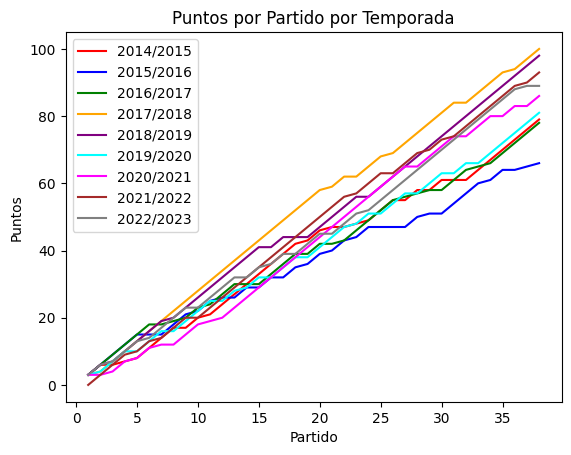

In [8]:
df = df_seasons

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Lista de colores para cada temporada
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'gray']

# Iterar sobre las temporadas y graficar los puntos con el color correspondiente
for i, season in enumerate(df['season'].unique()):
    season_data = df[df['season'] == season]
    season_data = season_data.reset_index(drop=True)  # Resetear el índice para cada temporada
    color = colors[i % len(colors)]  # Obtener el color correspondiente de la lista
    ax.plot(season_data.index + 1, season_data['points'], label=season, color=color)  # +1 para empezar desde 1 en lugar de 0

# Configurar el gráfico
ax.set_xlabel('Partido')
ax.set_ylabel('Puntos')
ax.set_title('Puntos por Partido por Temporada')
ax.legend()

# Mostrar el gráfico
plt.show()



In [9]:
from sklearn.linear_model import LinearRegression

# Crear una nueva columna 'match_number' que se reinicia para cada temporada
df_seasons['match_number'] = df_seasons.groupby('season').cumcount() + 1
# Eliminar las filas con valores faltantes en la columna 'points'
df_clean = df_seasons.dropna(subset=['points'])



# Resto del código de la regresión lineal

# Obtener los datos de entrada (eje x) y salida (eje y)
mean_points = df_seasons['points'].mean()
df_seasons['points'] = df_seasons['points'].fillna(mean_points)

# Obtener los datos de entrada (eje x) y salida (eje y)
x = df_clean['match_number']
y = df_clean['points']

x = df_seasons['match_number'].values.reshape(-1, 1)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(x, y)

# Predecir los valores de y usando el modelo
y_pred = model.predict(x)

In [10]:
print(df_seasons.columns)

Index(['id', 'isResult', 'side', 'datetime', 'result', 'id.1', 'title',
       'short_title', 'id.2', 'title.1', 'short_title.1', 'win', 'draw',
       'loss', 'season', 'point', 'points', 'match_number'],
      dtype='object')


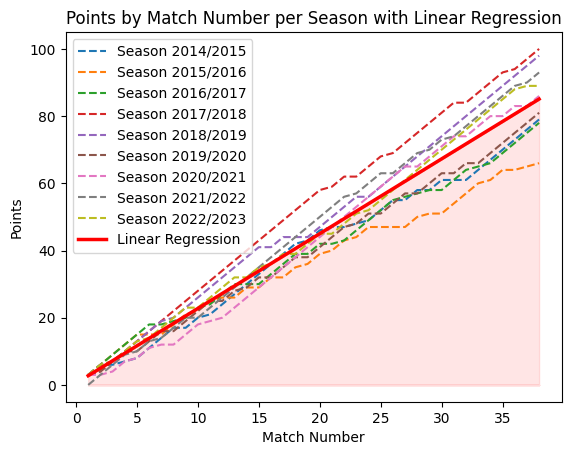

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Obtener los valores únicos de la columna "season"
seasons = df_seasons['season'].unique()

# Generar una lista de colores automáticamente utilizando TABLEAU_COLORS
colors = list(mcolors.TABLEAU_COLORS.keys())

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Iterar sobre las temporadas y graficar los puntos correspondientes con su color respectivo
for i, season in enumerate(seasons):
    season_data = df_seasons[df_seasons['season'] == season]
    season_data = season_data.reset_index(drop=True) # Resetear el índice para cada temporada
    ax.plot(season_data.index + 1, season_data['points'], label=f'Season {season}', c=colors[i % len(colors)], linestyle='--')  # +1 para empezar desde 1 en lugar de 0


# Realizar la regresión lineal
y_pred = model.predict(x)

# Graficar la línea de regresión con un color distinto, línea discontinua y grosor aumentado
ax.plot(x, y_pred, color='red', linestyle='-', linewidth=2.5, label='Linear Regression')

# Añadir un sombreado alrededor de la línea de regresión lineal
ax.fill_between(x.flatten(), y_pred, color='red', alpha=0.1)

# Configurar el gráfico
ax.set_xlabel('Match Number')
ax.set_ylabel('Points')
ax.set_title('Points by Match Number per Season with Linear Regression')
ax.legend()

# Mostrar el gráfico
plt.show()


#Match Predictions


In [12]:
print(df_matches.columns)

Index(['id', 'minute', 'result', 'X', 'Y', 'xG', 'player', 'h_a', 'player_id',
       'situation', 'season', 'shotType', 'match_id', 'h_team', 'a_team',
       'h_goals', 'a_goals', 'date', 'player_assisted', 'lastAction'],
      dtype='object')


In [13]:
print(df_matches['result'].unique())

['MissedShots' 'BlockedShot' 'SavedShot' 'Goal' 'OwnGoal' 'ShotOnPost']


In [14]:
df_matches.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,14532,15,MissedShots,0.796,0.701,0.018543,Rémy Cabella,h,3390,OpenPlay,2014/2015,RightFoot,4757,Newcastle United,Manchester City,0,2,2014-08-17 16:00:00,Moussa Sissoko,Pass
1,14533,22,MissedShots,0.708,0.299,0.010067,Emmanuel Rivière,h,777,OpenPlay,2014/2015,RightFoot,4757,Newcastle United,Manchester City,0,2,2014-08-17 16:00:00,Yoan Gouffran,TakeOn
2,14535,30,MissedShots,0.880,0.684,0.051551,Emmanuel Rivière,h,777,OpenPlay,2014/2015,LeftFoot,4757,Newcastle United,Manchester City,0,2,2014-08-17 16:00:00,Rémy Cabella,Pass
3,14536,34,MissedShots,0.947,0.726,0.042765,Emmanuel Rivière,h,777,OpenPlay,2014/2015,LeftFoot,4757,Newcastle United,Manchester City,0,2,2014-08-17 16:00:00,Paul Dummett,Pass
4,14538,49,BlockedShot,0.974,0.627,0.062886,Yoan Gouffran,h,916,FromCorner,2014/2015,RightFoot,4757,Newcastle United,Manchester City,0,2,2014-08-17 16:00:00,NaN,None


In [15]:
# Agrupar por 'match_id' y calcular el total de goles excluyendo 'OwnGoal' para cada lado
df_grouped = df_matches.groupby('match_id').agg({'season': 'first',
                                                 'h_team': 'first',
                                                 'a_team': 'first',
                                                 'h_goals': 'max',
                                                 'a_goals': 'max',
                                                 'h_a': 'first'}).reset_index()

# Calcular el total de goles para cada lado y filtrar las filas sin goles
df_goals_h = df_matches[(df_matches['result'] != 'OwnGoal') & (df_matches['h_a'] == 'h')].groupby('match_id').size().rename('result_h')
df_goals_a = df_matches[(df_matches['result'] != 'OwnGoal') & (df_matches['h_a'] == 'a')].groupby('match_id').size().rename('result_a')

# Combinar los totales de goles con el DataFrame agrupado
df_grouped = df_grouped.merge(df_goals_h, on='match_id', how='left')
df_grouped = df_grouped.merge(df_goals_a, on='match_id', how='left')

# Calcular el porcentaje de goles para cada equipo en cada partido
df_grouped['h_%goal'] = df_grouped['h_goals'] / df_grouped['result_h']
df_grouped['a_%goal'] = df_grouped['a_goals'] / df_grouped['result_a']

In [16]:
df_grouped.head()

,match_id,season,h_team,a_team,h_goals,a_goals,h_a,result_h,result_a,h_%goal,a_%goal
0,90,2015/2016,West Bromwich Albion,Manchester City,0,3,h,9.0,20,0.000000,0.150000
1,99,2015/2016,Manchester City,Chelsea,3,0,h,18.0,10,0.166667,0.000000
2,108,2015/2016,Everton,Manchester City,0,2,h,10.0,16,0.000000,0.125000
3,117,2015/2016,Manchester City,Watford,2,0,h,18.0,7,0.111111,0.000000
4,123,2015/2016,Crystal Palace,Manchester City,0,1,h,10.0,21,0.000000,0.047619


In [17]:
filtered_df = df_seasons[df_seasons['id'] == 90]
filtered_df

,id,isResult,side,datetime,result,id.1,title,short_title,id.2,title.1,short_title.1,win,draw,loss,season,point,points,match_number
38,90,True,away,2015-08-10 23:00:00,w,76,West Bromwich Albion,WBA,88,Manchester City,MCI,0.074413,0.191784,0.733803,2015/2016,3,3,1


In [18]:
# Agregar columnas de porcentajes de victorias, empates y derrotas a df_grouped
df_grouped['win%'] = df_seasons[df_seasons['id'].isin(df_grouped['match_id'])]['win']
df_grouped['draw%'] = df_seasons[df_seasons['id'].isin(df_grouped['match_id'])]['draw']
df_grouped['loss%'] = df_seasons[df_seasons['id'].isin(df_grouped['match_id'])]['loss']
df_grouped['result'] = df_seasons[df_seasons['id'].isin(df_grouped['match_id'])]['result']

In [19]:
df_grouped.head()

,match_id,season,h_team,a_team,h_goals,a_goals,h_a,result_h,result_a,h_%goal,a_%goal,win%,draw%,loss%,result
0,90,2015/2016,West Bromwich Albion,Manchester City,0,3,h,9.0,20,0.000000,0.150000,0.246341,0.262430,0.491229,w
1,99,2015/2016,Manchester City,Chelsea,3,0,h,18.0,10,0.166667,0.000000,0.461520,0.282050,0.256430,w
2,108,2015/2016,Everton,Manchester City,0,2,h,10.0,16,0.000000,0.125000,0.489189,0.390544,0.120268,l
3,117,2015/2016,Manchester City,Watford,2,0,h,18.0,7,0.111111,0.000000,0.359587,0.195853,0.444560,d
4,123,2015/2016,Crystal Palace,Manchester City,0,1,h,10.0,21,0.000000,0.047619,0.358269,0.301506,0.340226,d


In [20]:
print(df_grouped.columns)

Index(['match_id', 'season', 'h_team', 'a_team', 'h_goals', 'a_goals', 'h_a',
       'result_h', 'result_a', 'h_%goal', 'a_%goal', 'win%', 'draw%', 'loss%',
       'result'],
      dtype='object')


In [21]:
df =  df_grouped

In [22]:
# Preprocesamiento de datos
df['is_MC_home'] = np.where(df['h_team'] == 'Manchester City', 1, 0)
df['result'] = df['result'].str.strip()  # Eliminar espacios adicionales
df['result'] = df['result'].map({'w': 0, 'd': 1, 'l': 2})  # Mapear correctamente

In [23]:
df.head(

)

,match_id,season,h_team,a_team,h_goals,a_goals,h_a,result_h,result_a,h_%goal,a_%goal,win%,draw%,loss%,result,is_MC_home
0,90,2015/2016,West Bromwich Albion,Manchester City,0,3,h,9.0,20,0.000000,0.150000,0.246341,0.262430,0.491229,0,0
1,99,2015/2016,Manchester City,Chelsea,3,0,h,18.0,10,0.166667,0.000000,0.461520,0.282050,0.256430,0,1
2,108,2015/2016,Everton,Manchester City,0,2,h,10.0,16,0.000000,0.125000,0.489189,0.390544,0.120268,2,0
3,117,2015/2016,Manchester City,Watford,2,0,h,18.0,7,0.111111,0.000000,0.359587,0.195853,0.444560,1,1
4,123,2015/2016,Crystal Palace,Manchester City,0,1,h,10.0,21,0.000000,0.047619,0.358269,0.301506,0.340226,1,0


In [24]:
result_counts = df['result'].value_counts()
print(result_counts)

0    240
2     52
1     50
Name: result, dtype: int64


In [25]:
class_0 = df[df['result'] == 0].sample(n=47, random_state=42)
class_2 = df[df['result'] == 2].sample(n=43, random_state=42)
class_1 = df[df['result'] == 1].sample(n=49, random_state=42)

In [26]:
new_df = pd.concat([class_0, class_2, class_1], ignore_index=True)

#Prediccion

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import tensorflow as tf

In [36]:
X_train = new_df[['is_MC_home', 'h_goals', 'a_goals', 'h_%goal', 'a_%goal', 'win%', 'draw%', 'loss%']]
y_train = new_df['result']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[['is_MC_home','h_goals', 'a_goals', 'h_%goal', 'a_%goal', 'win%', 'draw%', 'loss%']])
X_test_scaled = scaler.transform(X_test[['is_MC_home','h_goals', 'a_goals', 'h_%goal', 'a_%goal', 'win%', 'draw%', 'loss%']])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(36, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=300, batch_size=None, verbose=1)

# Evaluación del modelo
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Epoch 1/300
4/4 [==============================] - 1s 6ms/step - loss: 1.0983 - accuracy: 0.3760
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 1.0809 - accuracy: 0.4400
Epoch 3/300
4/4 [==============================] - 0s 5ms/step - loss: 1.0743 - accuracy: 0.4560
Epoch 4/300
4/4 [==============================] - 0s 5ms/step - loss: 1.0604 - accuracy: 0.4800
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 1.0533 - accuracy: 0.4960
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 1.0432 - accuracy: 0.5200
Epoch 7/300
4/4 [==============================] - 0s 6ms/step - loss: 1.0365 - accuracy: 0.4960
Epoch 8/300
4/4 [==============================] - 0s 6ms/step - loss: 1.0293 - accuracy: 0.5120
Epoch 9/300
4/4 [==============================] - 0s 5ms/step - loss: 1.0258 - accuracy: 0.4720
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 1.0158 - accuracy: 0.5200
Epoch 11/300
4/4 [===========

In [37]:
# Realizar la predicción en los datos de prueba
predictions = model.predict(X_test_scaled)

# Obtener las etiquetas predichas
predicted_labels = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 83ms/step


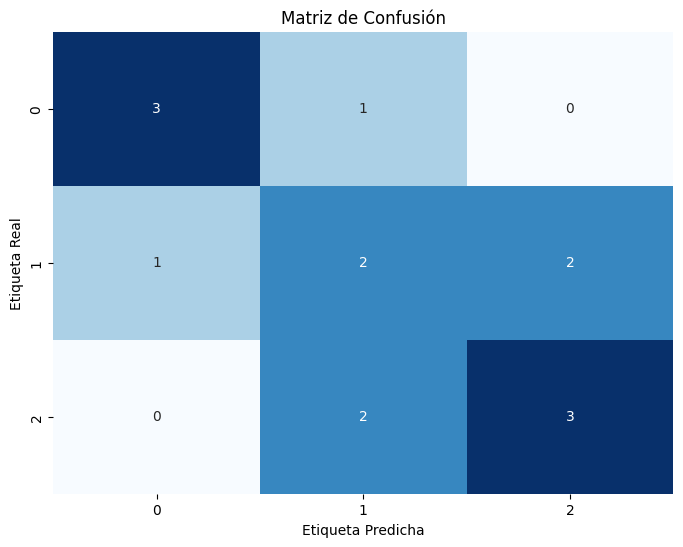

In [38]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, predicted_labels)

# Crear el gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

1/1 [==============================] - 0s 22ms/step


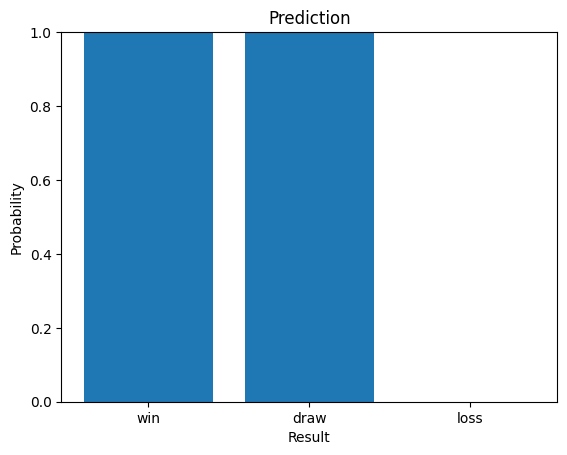

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import ipywidgets as widgets
from IPython.display import display, clear_output

# Crear los widgets para ingresar los valores
is_MC_home_widget = widgets.Checkbox(value=False, description='Is MC Home')
h_goals_widget = widgets.FloatSlider(value=0, min=0, max=10, step=1, description='H Goals')
a_goals_widget = widgets.FloatSlider(value=0, min=0, max=10, step=1, description='A Goals')
h_goal_percentage_widget = widgets.FloatSlider(value=0, min=0, max=100, step=1, description='H Goal %')
a_goal_percentage_widget = widgets.FloatSlider(value=0, min=0, max=100, step=1, description='A Goal %')
win_percentage_widget = widgets.FloatSlider(value=0, min=0, max=100, step=1, description='Win %')
draw_percentage_widget = widgets.FloatSlider(value=0, min=0, max=100, step=1, description='Draw %')
loss_percentage_widget = widgets.FloatSlider(value=0, min=0, max=100, step=1, description='Loss %')

# Variable global para almacenar el gráfico de barras
bar_chart = None

# Función para realizar la predicción y actualizar el gráfico de barras
def update_prediction(button):
    global bar_chart

    # Obtener los valores ingresados en los widgets
    is_MC_home = is_MC_home_widget.value
    h_goals = h_goals_widget.value
    a_goals = a_goals_widget.value
    h_goal_percentage = h_goal_percentage_widget.value
    a_goal_percentage = a_goal_percentage_widget.value
    win_percentage = win_percentage_widget.value
    draw_percentage = draw_percentage_widget.value
    loss_percentage = loss_percentage_widget.value

    # Crear un DataFrame con los valores ingresados
    input_data = pd.DataFrame({
        'is_MC_home': [is_MC_home],
        'h_goals': [h_goals],
        'a_goals': [a_goals],
        'h_%goal': [h_goal_percentage],
        'a_%goal': [a_goal_percentage],
        'win%': [win_percentage],
        'draw%': [draw_percentage],
        'loss%': [loss_percentage]
    })

    # Escalar los datos de entrada
    input_data_scaled = scaler.transform(input_data)

    # Realizar la predicción
    prediction = model.predict(input_data_scaled)[0]

    # Limpiar el gráfico anterior
    if bar_chart is not None:
        for bar in bar_chart:
            bar.remove()

    # Crear el nuevo gráfico de barras
    bar_chart = plt.bar(['win', 'draw', 'loss'], prediction)
    plt.xlabel('Result')
    plt.ylabel('Probability')
    plt.title('Prediction')
    plt.ylim([0, 1])
    plt.show()

# Función para borrar el gráfico
def clear_plot(button):
    global bar_chart

    # Limpiar el gráfico anterior
    if bar_chart is not None:
        for bar in bar_chart:
            bar.remove()
        plt.draw()

# Función para restablecer los valores de los widgets
def reset_values(button):
    is_MC_home_widget.value = False
    h_goals_widget.value = 0
    a_goals_widget.value = 0
    h_goal_percentage_widget.value = 0
    a_goal_percentage_widget.value = 0
    win_percentage_widget.value = 0
    draw_percentage_widget.value = 0
    loss_percentage_widget.value = 0

# Crear los botones
show_button = widgets.Button(description='Mostrar gráfico')
show_button.on_click(update_prediction)

clear_button = widgets.Button(description='Borrar gráfico')
clear_button.on_click(clear_plot)

reset_button = widgets.Button(description='Nuevo resultado')
reset_button.on_click(reset_values)

# Mostrar los widgets y botones
display(widgets.VBox([
    is_MC_home_widget,
    h_goals_widget,
    a_goals_widget,
    h_goal_percentage_widget,
    a_goal_percentage_widget,
    win_percentage_widget,
    draw_percentage_widget,
    loss_percentage_widget,
    show_button,
    clear_button,
    reset_button
]))


In [32]:
print(df_players.columns)

Index(['id', 'player_name', 'games', 'time', 'goals', 'xG', 'assists', 'xA',
       'shots', 'key_passes', 'yellow_cards', 'red_cards', 'position',
       'team_title', 'npg', 'npxG', 'xGChain', 'xGBuildup', 'season'],
      dtype='object')


In [33]:
df_players

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup,season
0,619,Sergio Agüero,33,2551,26,25.270176,8,5.568927,148,33,4,0,F S,Manchester City,21,20.703195,27.805153,6.878170,2014/2015
1,617,David Silva,32,2682,12,9.096988,7,10.388411,66,92,8,0,M,Manchester City,12,9.096988,29.144268,16.633574,2014/2015
2,878,Yaya Touré,29,2358,10,7.109347,1,3.243580,89,33,5,0,M S,Manchester City,8,5.587009,26.024341,20.903273,2014/2015
3,4418,Frank Lampard,32,958,6,4.004464,1,0.952922,32,15,1,0,M S,Manchester City,6,4.004464,11.039330,7.293274,2014/2015
4,489,James Milner,32,1732,5,5.722099,7,4.971145,39,52,6,0,F M S,Manchester City,5,5.722099,15.702086,8.751346,2014/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,8786,Stefan Ortega Moreno,3,270,0,0.000000,0,0.000000,0,0,0,0,GK,Manchester City,0,0.000000,0.421934,0.421934,2022/2023
214,8961,Rúben Dias,26,2006,0,1.935591,0,0.394248,10,3,3,0,D S,Manchester City,0,1.935591,12.852464,12.492974,2022/2023
215,10847,Rico Lewis,14,904,0,0.200318,0,1.379109,5,11,1,0,D M S,Manchester City,0,0.200318,6.514687,5.571969,2022/2023
216,11378,Máximo Perrone,1,17,0,0.000000,0,0.000000,0,0,0,0,S,Manchester City,0,0.000000,0.000000,0.000000,2022/2023


In [34]:
# Filtrar el DataFrame para obtener solo los datos de "Sergio Agüero"
sergio_aguero_data = df_players[df_players['player_name'] == 'Sergio Agüero']

# Imprimir el resultado
(sergio_aguero_data)

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup,season
0,619,Sergio Agüero,33,2551,26,25.270176,8,5.568927,148,33,4,0,F S,Manchester City,21,20.703195,27.805153,6.878170,2014/2015
24,619,Sergio Agüero,30,2399,24,20.077226,2,2.028760,119,27,1,0,F S,Manchester City,20,16.271373,18.786801,3.925959,2015/2016
49,619,Sergio Agüero,31,2408,20,22.672588,3,4.665909,139,31,4,1,F S,Manchester City,16,18.866738,25.352087,5.026675,2016/2017
74,619,Sergio Agüero,25,1985,21,18.568616,6,6.533232,95,39,2,0,F S,Manchester City,17,15.523946,23.707817,7.512720,2017/2018
99,619,Sergio Agüero,33,2515,21,19.949161,8,5.229244,118,34,3,0,F S,Manchester City,19,18.426823,28.700229,8.100993,2018/2019
121,619,Sergio Agüero,24,1462,16,15.557497,3,2.920210,76,19,1,0,F S,Manchester City,14,13.274028,16.878258,2.644767,2019/2020
152,619,Sergio Agüero,12,556,4,3.716519,1,1.315660,19,7,0,0,F M S,Manchester City,3,2.194181,4.158572,1.283172,2020/2021


In [35]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Obtener la lista de nombres de jugadores únicos
jugadores_unicos = df_players['player_name'].unique()

# Crear los widgets para la selección del jugador y la columna objetivo
jugador_dropdown = widgets.Dropdown(options=jugadores_unicos, description='Jugador:')
columna_dropdown = widgets.Dropdown(options=df_players.columns, description='Columna objetivo:')

# Función para entrenar el modelo
def entrenar_modelo(btn):
    jugador_seleccionado = jugador_dropdown.value
    columna_objetivo = columna_dropdown.value

    # Filtrar el DataFrame por el jugador seleccionado
    jugador_df = df_players[df_players['player_name'] == jugador_seleccionado]

    # Obtener los datos de entrada (características) y la variable objetivo
    X = jugador_df.drop(columns=['player_name', 'position', 'team_title', 'season', columna_objetivo])
    y = jugador_df[columna_objetivo]

    # Configurar y entrenar el modelo de RNA utilizando los datos
    # Aquí debes colocar el código para configurar y entrenar tu modelo de RNA.
    # Puedes utilizar librerías como scikit-learn, Keras o TensorFlow para esto.
    # A continuación se muestra un ejemplo básico utilizando scikit-learn:

    from sklearn.neural_network import MLPRegressor

    # Crear y configurar el modelo
    model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='logistic', solver='adam', random_state=42)

    # Entrenar el modelo
    model.fit(X, y)

    # Realizar una predicción con el modelo entrenado
    nueva_muestra = X.iloc[0].values.reshape(1, -1)  # Obtener la primera muestra como ejemplo
    prediccion = model.predict(nueva_muestra)

    # Mostrar la predicción en la interfaz
    resultado_prediccion.value = str(prediccion)

    # Mostrar información sobre el entrenamiento del modelo en la interfaz
    resultado_entrenamiento.value = "El modelo ha sido entrenado con éxito."


def obtener_prediccion(event):
    prediccion = entrenar_modelo(None)

# Crear el botón de entrenamiento del modelo
boton_entrenar = widgets.Button(description='Entrenar modelo')
boton_entrenar.on_click(entrenar_modelo)

# Crear el cuadro de texto para mostrar la predicción
resultado_prediccion = widgets.Text()

# Crear el cuadro de texto para mostrar la información de entrenamiento
resultado_entrenamiento = widgets.Text()

# Asociar la función obtener_prediccion al evento on_displayed de la interfaz
display(jugador_dropdown, columna_dropdown, boton_entrenar, resultado_prediccion, resultado_entrenamiento, on_displayed=obtener_prediccion)



Dropdown(description='Jugador:', options=('Sergio Agüero', 'David Silva', 'Yaya Touré', 'Frank Lampard', 'Jame…

Dropdown(description='Columna objetivo:', options=('id', 'player_name', 'games', 'time', 'goals', 'xG', 'assis…

Button(description='Entrenar modelo', style=ButtonStyle())

Text(value='')

Text(value='')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
